Task 3 ZNE
Zero-noise extrapolation (ZNE) is a noise mitigation technique. It works by intentionally scaling the noise of a quantum circuit to then extrapolate the zero-noise limit of an observable of interest. In this task, you will build a simple ZNE function from scratch:
Build a simple noise model with depolarizing noise
Create different circuits to test your noise models and choose the observable to measure
Apply the unitary folding method.
Apply the extrapolation method to get the zero-noise limit. Different extrapolation methods achieve different results, such as Linear, polynomial, and exponential.
Compare mitigated and unmitigated results
Bonus: Run your ZNE function in real quantum hardware through the IBM Quantum Service

Check the Mitiq documentation for references. You are not allowed to use the functions from Mitiq or any other frameworks where ZNE is already implemented.


Evaluating Error Mitigation Strategies for Ground State Calculation of H2 Molecule

This project focuses on investigating various methodologies to determine the ground state of the H2 molecule, each with its own set of advantages and limitations. The methodologies explored primarily involve considering single and double excitations. Some of the approaches employed simplify the model significantly but may sacrifice chemical accuracy, while others leverage error mitigation techniques more efficiently, particularly through Qiskit runtime, which complements hybrid algorithms like VQE.

we also look into Various error mitigation techniques like Zero noise extrpolation and it's variants to study the energy landscape curve and to observe the Mitigated and unmitigated error results

For this project, the following modules are required: Qiskit and Pennylane for conducting quantum simulations, PySCF as an open-source library containing electronic structure modules, as well as Mitiq from Unitary fund and other Visualization and plotting packages
.

In [ ]:
#Install the required packages
'''
!pip install qiskit
!pip install pennylane
!pip install qiskit_nature
!pip install scipy
!pip install pyscf
!pip install qiskit_ibm_runtime
'''

'\n!pip install qiskit\n!pip install pennylane\n!pip install qiskit_nature\n!pip install scipy\n!pip install pyscf\n!pip install qiskit_ibm_runtime\n'

In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.3 MB/s eta 0:00:00


In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 42.1 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 62.3 MB/s eta 0:00:00


In [ ]:
!pip install qiskit_nature
!pip install qiskit_ibm_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 35.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 17.0 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.52.0-py3-none-any.whl size=331902 sha256=030b41b9c70520db307bd1575eed69b3959044f4a20

In [ ]:
# Import necessary libraries and packages
import math
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Here we have utilize the PennyLane library to load a dataset for the linear H2 molecule at a bond length of 1.1 angstroms. The h2datasets = qml.data.load('qchem', molname="H2" , basis="STO-3G", bondlength=1.1) line loads the dataset for the linear H2 molecule using the QChem plugin in PennyLane. It specifies the molecule name as "H2", the basis set as "STO-3G", and the bond length as 1.1 angstroms.

The hamiltonian = h2datasets[0].hamiltonian line extracts the Hamiltonian from the loaded dataset. The dataset may contain multiple entries, so we access the first entry (h2datasets[0]) and then extract the Hamiltonian associated with it.

 The qubits = len(hamiltonian.wires) line calculates the number of qubits needed to represent the Hamiltonian. It does so by accessing the wires attribute of the Hamiltonian object and determining its length.

 the code prints out the number of qubits needed and the Hamiltonian itself for inspection.








In [ ]:
# use pennylane dataset for the linear H2 at bond length 1.1
h2datasets = qml.data.load('qchem', molname="H2" , basis="STO-3G", bondlength=1.1)

hamiltonian = h2datasets[0].hamiltonian

# get the qubits
qubits = len(hamiltonian.wires)
#return Hamiltonian and qubits
print("Number of qubits needed:", qubits)
print("Hamiltonian:\n", hamiltonian)

Number of qubits needed: 4
Hamiltonian:
   (-0.3796867241618816) [I0]
+ (-0.10485523662149618) [Z2]
+ (-0.10485523662149615) [Z3]
+ (0.1265398827193729) [Z0]
+ (0.1265398827193729) [Z1]
+ (0.10102818539518765) [Z0 Z2]
+ (0.10102818539518765) [Z1 Z3]
+ (0.15183377864956338) [Z0 Z3]
+ (0.15183377864956338) [Z1 Z2]
+ (0.15229282586796247) [Z0 Z1]
+ (0.1593698831813122) [Z2 Z3]
+ (-0.05080559325437572) [Y0 Y1 X2 X3]
+ (-0.05080559325437572) [X0 X1 Y2 Y3]
+ (0.05080559325437572) [Y0 X1 X2 Y3]
+ (0.05080559325437572) [X0 Y1 Y2 X3]


In [ ]:
import pennylane as qml
import pennylane.numpy as np

# symbols
symbols = ["H", "H"]

# geometry
a = 0.735  # Interatomic distance in Angstroms
geometry = np.array([[0.0, 0.0, 0.0],
                     [a, 0.0, 0.0]])

# Generate the Hamiltonian
hamiltonian, qubits = qml.qchem.molecular_hamiltonian(
    symbols=symbols,
    coordinates=geometry,
    charge=0,
    mult=1,
    basis='sto-3g',
    active_electrons=2,
    active_orbitals=2,
    mapping='jordan_wigner'
)

print("Number of qubits needed:", qubits)
print("Hamiltonian:\n", hamiltonian)


Number of qubits needed: 4
Hamiltonian:
   (-0.46369623396031834) [Z2]
+ (-0.46369623396031834) [Z3]
+ (0.23778812410837596) [Z0]
+ (0.23778812410837608) [Z1]
+ (0.7905416330590227) [I0]
+ (0.1407985649566525) [Z0 Z2]
+ (0.1407985649566525) [Z1 Z3]
+ (0.18181634392622156) [Z0 Z3]
+ (0.18181634392622156) [Z1 Z2]
+ (0.18466765822804881) [Z0 Z1]
+ (0.19192132833814002) [Z2 Z3]
+ (-0.041017778969569096) [Y0 Y1 X2 X3]
+ (-0.041017778969569096) [X0 X1 Y2 Y3]
+ (0.041017778969569096) [Y0 X1 X2 Y3]
+ (0.041017778969569096) [X0 Y1 Y2 X3]


In [ ]:
aux = 4 # number estimation qubits

wires_target = range(qubits) # qubits for the Hamiltonian
wires_estimation = range(qubits, qubits + aux) # qubits for the estimation

hf = h2datasets[0].hf_state # initial hartree-fock state

In [ ]:
dev = qml.device("lightning.qubit", wires= qubits + aux)

In [ ]:

@qml.qnode(dev)
def exact_QPE(HCoefs, HTuples, time):
    qml.QubitStateVector(initial_state, wires=wires_target) # eigenstate preparation
    U_exact=np.conj(exactU(HCoefs,HTuples,time)) # exact exp(iUt) operator
    qml.QuantumPhaseEstimation(U_exact, target_wires=wires_target, estimation_wires=wires_estimation)
    return qml.probs(wires_estimation)

In [ ]:
H =  qml.PauliZ(0) @ qml.PauliZ(1) + qml.PauliZ(1) @ qml.PauliZ(2) + qml.PauliZ(2) @ qml.PauliZ(3)  + qml.PauliX(0) + qml.PauliX(1) + qml.PauliX(2) + qml.PauliX(3)


In [ ]:
energies = np.zeros(2)

# Get the number of qubits in the Hamiltonian
num_qubits = len(H.wires)

# Initialize the device
dev = qml.device('default.qubit', wires=num_qubits)

In [ ]:
def ansatz(params, wires, state_idx=0):

    qml.PauliX(wires=wires[state_idx])
    qml.templates.StronglyEntanglingLayers(params, wires=wires)

In [ ]:
def total_cost(params):
    cost = 0
    for state_idx in range(num_qubits):
        cost += w[state_idx] * single_cost(params, state_idx=state_idx)
    return cost

In [ ]:
# Set up a cost function and optimizer
opt = qml.AdamOptimizer(stepsize=0.05)
max_iterations = 100
costs = []

# Initial parameters for the ansatze
num_layers = 9
params = np.random.uniform(low=0, high=2*np.pi, size=(num_layers, num_qubits, 3))

In [ ]:
energies = ",".join([str(E) for E in energies])

In [ ]:
energies

'0,.,0,,,0,.,0'

In [ ]:
wires = dev.wires.tolist()


@qml.qnode(dev)
def energy_expval(params):
    circuit(params, wires)
    return qml.expval(h)


@qml.qnode(dev)
def S2_expval(params):
    circuit(params, wires)
    return qml.expval(S2)

In [ ]:
#Generate the vector representing the Hartree-Fock state
dev = qml.device("default.qubit", wires=qubits)
electrons = 2
hf = qml.qchem.hf_state(electrons, qubits)
print(hf)

[1 1 0 0]


In [ ]:
#Initialize qubit registers
def circuit(param, wires):
    qml.BasisState(hf, wires=wires)
    qml.DoubleExcitation(param, wires=[0, 1, 2, 3])


In [ ]:
@qml.qnode(dev, interface="autograd")
def cost_fn(param):
    circuit(param, wires=range(qubits))
    return qml.expval(hamiltonian)

In [ ]:
#Use a basic gradient-descent optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.4)

In [ ]:
theta = np.array(0.0, requires_grad=True)

Here we install Mitiq and do the necessary imports

In [ ]:
!pip install mitiq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.2/167.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 28.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

In [ ]:
import mitiq

mitiq.SUPPORTED_PROGRAM_TYPES.keys()

dict_keys(['cirq', 'pyquil', 'qiskit', 'braket', 'pennylane', 'qibo'])

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [ ]:
frontend = "pennylane"

In [ ]:
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brute
import cirq

import pennylane as qml
from pennylane.pauli import pauli_word_to_string
!pip install openfermionpyscf
import mitiq
from mitiq import zne  # Zero-noise extrapolation module
from mitiq.interface.mitiq_cirq import compute_density_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=c9feed020adec185910a0a49c81e0644a6438ddc2bd1d234c5481c86cd3bdcd0
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy


Here, we have a function named energy that computes the energy at a given bond length (radius) using a provided ansatz circuit and a specified noise strength for depolarizing noise.



It initializes a mitiq.Executor object named executor, which is used to evaluate the expectation value of the Hamiltonian with respect to the provided ansatz circuit.

The noise_model variable is created using cirq.depolarize function with the specified depo_noise_strength, which generates a depolarizing noise model.

 the evaluate() method of the executor object is called with the provided ansatz, hamiltonian, and noise_model. The expectation value of the Hamiltonian is computed with the given noise model, and the real part of the result is returned as the energy value.

In [ ]:
def energy(
    ansatz: cirq.Circuit, radius_index: int, depo_noise_strength: float = 0.05
) -> float:
    """Computes the energy at a given bond length (radius)."""
    hamiltonian = hamiltonians[radius_index]
    executor = mitiq.Executor(compute_density_matrix)
    noise_model = cirq.depolarize(depo_noise_strength)
    expec_val = executor.evaluate(ansatz, hamiltonian, noise_model=noise_model)[0]
    return expec_val.real


Here we have a funchun named ansatz that returns a parametrized quantum corccuit. This circuit is commonly used in variational quantum algorithms for quantum chemistry simulations.

The function takes a single parameter theta, which is a floating-point value representing the variational parameter of the circuit.

Inside the function, a quantum register qreg consisting of two qubits is initialized using cirq.LineQubit.range(2). This creates a list of two qubits labeled as [0, 1].

The function then constructs a Cirq quantum circuit using the initialized qubits and a series of quantum gates
This ansatz circuit introduces entanglement between the qubits through the CNOT gates and applies single-qubit rotations parameterized by theta. This parameter can be optimized to minimize the energy of the quantum system, typically using variational algorithms like the Variational Quantum Eigensolver (VQE).

In [ ]:
def ansatz(theta: float) -> cirq.Circuit:
    """Returns the circuit associated to the input variational parameter."""
    qreg = cirq.LineQubit.range(2)
    return cirq.Circuit(
        cirq.ops.X.on(qreg[1]),
        cirq.ops.ry(np.pi / 2).on(qreg[0]),
        cirq.ops.rx(-np.pi / 2).on(qreg[1]),
        cirq.ops.CNOT.on(*qreg),
        cirq.ops.rz(theta).on(qreg[1]),
        cirq.ops.CNOT.on(*qreg),
        cirq.ops.ry(-np.pi / 2).on(qreg[0]),
        cirq.ops.rx(np.pi / 2).on(qreg[1]),
    )

Here in the next step we define the geometry of the molecule using the code given in Mitiq documentation

In [ ]:
ang_to_bohr = 1.8897259886
def molecular_hamiltonian(bond_length: float) -> mitiq.Observable:
    """ Builds the Hamiltonian for H2 at a given bond length """
    symbols = ['H', 'H']
    geometry = ang_to_bohr * np.array([[0., 0., - 0.5 * bond_length],
                                       [0., 0., 0.5 * bond_length]])
    mol = qml.qchem.Molecule(symbols, geometry)
    Hamil, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry, basis="sto-6g",
                                                    method="pyscf", mapping="bravyi_kitaev")

    # tapering the Hamiltonian using symmetries
    generators = [qml.PauliZ(1), qml.PauliZ(3)] # symmetries corresponding to qubit 1 and 3
    paulix_ops = [qml.PauliX(1), qml.PauliX(3)] # corresponding paulix ops for tapering
    eigval_sec = [1, 1] # optimal sector containing the ground state
    Hamil_tapered = qml.taper(Hamil, generators, paulix_ops, eigval_sec)

    # converting the tapered Hamiltonian to mitiq Observable
    coeffs, ops = Hamil_tapered.terms()
    wire_map = {0 : 0, 2 : 1} # for relabeling the qubits in the Pauli representation
    pauli_str = [mitiq.PauliString(
                pauli_word_to_string(op, wire_map=wire_map), coeff=coeff)
                 for coeff, op in zip(coeffs, ops)]
    hamil_obs = mitiq.Observable(*pauli_str)

    return hamil_obs

radii = np.linspace(0.2, 2.6, 13)
hamiltonians = [molecular_hamiltonian(rad) for rad in radii]
print(f"Hamiltonian at R = {radii[0]} Angstroms is:\n {hamiltonians[0]}")

Hamiltonian at R = 0.2 Angstroms is:
 (2.8489027036618326+0j)*I + (0.5678139466276187+0j)*Z(q(0)) + (-1.4507698908879108+0j)*Z(q(1)) + (0.07906938229945977+0j)*Y(q(0))*Y(q(1)) + (0.07906938229945977+0j)*X(q(0))*X(q(1)) + (0.679939485653948+0j)*Z(q(0))*Z(q(1))


In [ ]:
# Define da quantum device
dev = qml.device("default.qubit", wires=2)

# Define the ansatz or variational form
def ansatz(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RZ(params[2], wires=0)  # Add RZ gate to wire 0
    qml.RX(params[3], wires=1)  # Add RX gate to wire 1

# Define a function to execute the circuit and simulate noise
def execute_circuit(params, noise_level):
    # Load the quantum circuit
    @qml.qnode(dev)
    def circuit(params):
        ansatz(params)
        return qml.expval(qml.PauliZ(0))

    # Apply depolarizing noise to the device
    dev_depolarized = mitiq.simulate.NoisyQuantumDevice(circuit, noise_model="depolarizing", noise_strength=noise_level)

In [ ]:
import numpy as np
import mitiq

def depolarizing_noise_model(p_error_one_qubit, p_error_two_qubit):
    """
    Create a noise model with depolarizing noise on all single-qubit and two-qubit gates.


    """
    def apply_noise(circuit):
        noisy_circuit = mitiq.add_depolarizing_noise(circuit, p_single_qubit=p_error_one_qubit, p_two_qubit=p_error_two_qubit)
        return noisy_circuit

    return apply_noise

# Example usage
p_error_one_qubit = 0.01
p_error_two_qubit = 0.005
dep_noise_model = depolarizing_noise_model(p_error_one_qubit, p_error_two_qubit)

Here we  defineoe two quantum circuits
 We define the variable num_qubits to specify the number of qubits in the quantum circuits. In this case, it's set to 2.

 The entangled_circuit function defines a simple entangled circuit consisting of a Hadamard gate applied to the first qubit (Hadamard(wires=0)) followed by a controlled-NOT (CNOT) gate acting on both qubits (CNOT(wires=[0, 1])). The expectation value of the Pauli-Z operator on the first qubit is returned as the circuit output.
The random_circuit function constructs a depth-3 random circuit. It iterates over each qubit and applies a Rot gate with randomly generated parameters (Rot(*params[i], wires=i)). After that, a series of gates including CNOT and additional Rot gates are applied in a structured manner. Finally, the expectation value of the Pauli-X operator on a randomly selected qubit is returned as the output.
 We define the observable for noiseless circuit execution. For the entangled circuit, we measure the expectation value of the tensor product of Pauli-Z operators acting on both qubits (qml.PauliZ(0) @ qml.PauliZ(1)). For the random circuit, we randomly select one qubit and measure the expectation value of the Pauli-X operator on that qubit (qml.PauliX(random.randint(0, num_qubits-1))).

 We specify the number of layers for the random circuit, set here to 3.

We initialize the device using PennyLane's default qubit simulator (qml.device("default.qubit", wires=num_qubits)).

We define a function create_random_circuit to generate the random circuit. Inside this function, we construct the circuit by iterating over the specified number of layers and applying randomly generated parameterized gates.

In [ ]:
# Define the number of qubits
num_qubits = 2

# Circuit 1: Simple Entangled Circuit
def entangled_circuit(params, **kwargs):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

# Circuit 2: Depth-3 Random Circuit
def random_circuit(params, **kwargs):
    for i in range(num_qubits):
        qml.Rot(*params[i], wires=i)

    qml.CNOT(wires=[0, 1])
    qml.Rot(*params[2], wires=0)
    qml.Rot(*params[3], wires=1)
    qml.CNOT(wires=[1, 0])
    qml.Rot(*params[4], wires=0)
    qml.Rot(*params[5], wires=1)

    return qml.expval(qml.PauliX(random.randint(0, num_qubits-1)))

# Define observable for noiseless circuit execution
observable = qml.PauliZ(0) @ qml.PauliZ(1)  # For Circuit 1
# observable = qml.PauliX(random.randint(0, num_qubits-1))  # For Circuit 2

# Define number of layers for random circuit
num_layers = 3

# Initialize device
dev = qml.device("default.qubit", wires=num_qubits)

# Define a function to create a random circuit
def create_random_circuit(num_layers):
    @qml.qnode(dev)
    def circuit(params):
        for layer in range(num_layers):
            random_params = np.random.rand(num_qubits, 3) * 2 * np.pi
            random_circuit(random_params)
        return qml.expval(observable)
    return circuit

# Create random circuit
random_circuit = create_random_circuit(num_layers)



In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from mitiq.zne import mitigate_executor
from mitiq.zne.inference import RichardsonFactory
from mitiq.zne.scaling import fold_global as folding

# Describe noise
noise_strength = 0.04


In [ ]:
# Ideal device
dev = qml.device('default.mixed', wires=2)

# Noisy device
dev_noisy = qml.transforms.insert(dev, qml.DepolarizingChannel, noise_strength)

# Define the variational circuit
def variational_circuit(gamma):
    qml.RX(gamma, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RX(gamma, wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RX(gamma, wires=0)


In [ ]:
# Observable to measure
z = np.diag([1, -1])
hamiltonian = np.kron(z, z)

@qml.qnode(dev)
def noiseless_executor(gamma):
    variational_circuit(gamma)
    return qml.expval(qml.Hermitian(hamiltonian, wires=[0, 1]))

@qml.qnode(dev_noisy)
def executor_with_noise(gamma):
    variational_circuit(gamma)
    return qml.expval(qml.Hermitian(hamiltonian, wires=[0, 1]))


applying Unitary folding now

In [ ]:
def unitary_folding(k, L, n, angs):
    print(f'Folding {k} times')

def generate_QC(L, n, angs):
    qc = QuantumCircuit(n)

    for i, ang in enumerate(angs):
        qc.rx(ang, i)

    return qc

    # Transpile the circuit
    transpiled = transpile(circ, sim_noise)

    # Compose the circuit with itself k-1 times
    for _ in range(k-1):
        transpiled = transpiled.compose(transpile(circ, sim_noise))

    # Measure all qubits
    transpiled.measure_all()

    # Print the transpiled circuit
    print(transpiled)

    # Simulate the transpiled circuit
    result_noise = sim_noise.run(transpiled).result()
    counts_noise = result_noise.get_counts()
    counts_noise_int = {int(z, 2): counts for z, counts in counts_noise.items()}
    prob_noise = probabilities(counts_noise_int)

    return prob_noise

# Example usage
L = 2
n = 2
angs = [0.1, 0.2, 0.3, 0.4]
k = 3

# Assume you have already defined generate_QC and probabilities functions
# and have instantiated sim_noise as an AerSimulator

unitary_folding_result = unitary_folding(k, L, n, angs)
print("Result:", unitary_folding_result)

Folding 3 times
Result: None


lets plot results

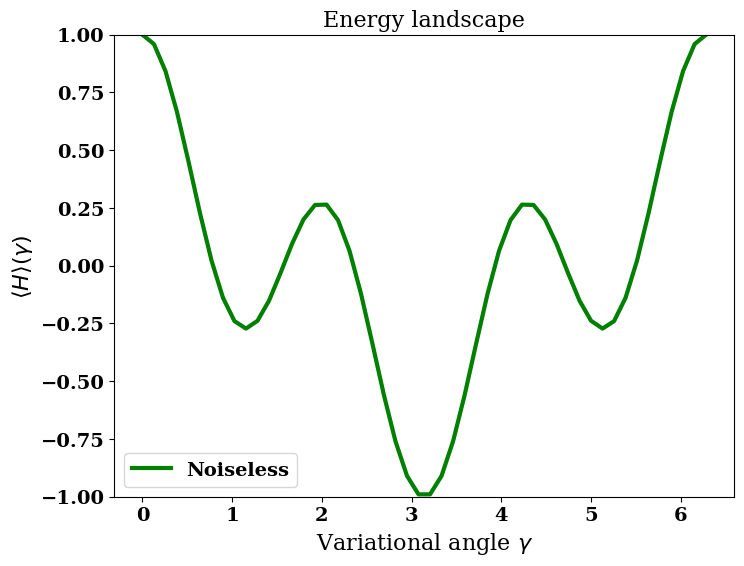

In [ ]:
gammas = np.linspace(0, 2 * np.pi, 50)
noiseless_expectations = [np.real(noiseless_executor(g)) for g in gammas]

plt.figure(figsize=(8, 6))
plt.plot(gammas, noiseless_expectations, color="g", linewidth=3, label="Noiseless")
plt.title("Energy landscape", fontsize=16)
plt.xlabel(r"Variational angle $\gamma$", fontsize=16)
plt.ylabel(r"$\langle H \rangle(\gamma)$", fontsize=16)
plt.legend(fontsize=14)
plt.ylim(-1, 1)
plt.show()


In [ ]:
!pip install qiskit-ibm-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.6/249.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_ground_state_number(executor, gammas, target_energy):
    """
    Plot the ground state number as a function of the variational parameter.

    Args:
        executor (function): Function to execute the quantum circuit and compute energy.
        gammas (array-like): Array of variational parameters.
        target_energy (float): Target ground state energy.

    Returns:
        None
    """
    # Compute the energies for different values of the variational parameter
    energies = [np.real(executor(g)) for g in gammas]

    # Compute the ground state number
    ground_state_numbers = [1 if energy <= target_energy else 0 for energy in energies]

    # Plot the ground state number
    plt.figure(figsize=(8, 6))
    plt.plot(gammas, ground_state_numbers, color="b", linewidth=2, label="Ground State")
    plt.title("Ground State Number", fontsize=16)
    plt.xlabel(r"Variational angle $\gamma$", fontsize=16)
    plt.ylabel("Ground State Number", fontsize=16)
    plt.legend(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.show()





In [ ]:
expectations = [np.real(executor_with_noise(g)) for g in gammas]


we compute and visualize energy landscapes of a quantum system under different noise levels, both with and without error mitigation using Zero-Noise Extrapolation (ZNE).


Energy Funcchun (energy)

This function computes the energy of a quantum circuit (ansatz) at a given bond length (radius) using a Hamiltonian defined by hamiltonians[radius_index].
It employs the mitiq.Executor to evaluate the expectation value of the Hamiltonian using compute_density_matrix.
The noise model function cirq.depolarize and noise level (depo_noise_strength,) are passed as keyword arguments (kwargs) to the Executor.
Ansatz Funchunn (ansatz)

This function returns a parameterized quantum circuit (cirq.Circuit) associated with the input variational parameter theta.
The circuit applies a series of quantum gates (X, RY, RX, CNOT, RZ) to two qubits.
Noise Levels and Variational Parameters

we Define the noise levels pvals and variational parameters thetas.
pvals: Tuple containing noise levels (depolarizing noise strength).
thetas: Array of variational parameters ranging from 0 to 2 * np.pi.

For each noise level (pval), we compute the energies of the quantum circuits for different thetas using the energy function.
Store the computed energies in all_energies.

we Apply Zero-Noise Extrapolation (ZNE) to mitigate the effects of noise on the computed energies.
Using the mitiq.zne.execute_with_zne function to execute the quantum circuits with error mitigation.
Store the mitigated energies in all_mitigated.
in the endd we Plot the unmitigated and mitigated energy landscapes side by side.
In the first subplot (Unmitigated), plot the energy landscapes for different noise levels without error mitigation.
In the second subplot (Mitigated with ZNE), plot the energy landscapes with error mitigation using ZNE.
The plots show how the energy landscapes change with varying noise levels and the effectiveness of error mitigation.








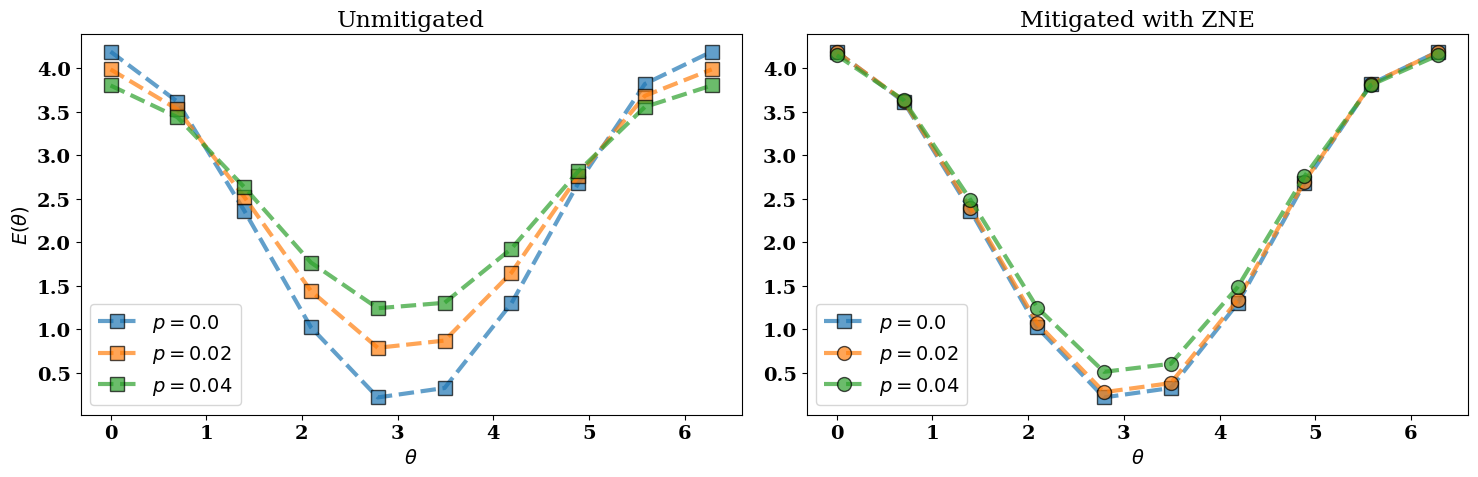

In [ ]:
import numpy as np
import cirq
import mitiq
from scipy.optimize import brute
from functools import partial

def energy(ansatz: cirq.Circuit, radius_index: int, depo_noise_strength: float = 0.05) -> float:
    """Computes the energy at a given bond length (radius)."""
    hamiltonian = hamiltonians[radius_index]
    executor = mitiq.Executor(compute_density_matrix)
    kwargs = {"noise_model_function": cirq.depolarize, "noise_level": (depo_noise_strength,)}
    expec_val = executor.evaluate(ansatz, hamiltonian, **kwargs)[0]
    return expec_val.real

def ansatz(theta: float) -> cirq.Circuit:
    """Returns the circuit associated with the input variational parameter."""
    qreg = cirq.LineQubit.range(2)
    return cirq.Circuit(
        cirq.ops.X.on(qreg[1]),
        cirq.ops.ry(np.pi / 2).on(qreg[0]),
        cirq.ops.rx(-np.pi / 2).on(qreg[1]),
        cirq.ops.CNOT.on(*qreg),
        cirq.ops.rz(theta).on(qreg[1]),
        cirq.ops.CNOT.on(*qreg),
        cirq.ops.ry(-np.pi / 2).on(qreg[0]),
        cirq.ops.rx(np.pi / 2).on(qreg[1]),
    )

# Noise levels
pvals = (0.00, 0.02, 0.04)
# Variational parameters
thetas = np.linspace(0.0, 2.0 * np.pi, 10)

all_energies = []
for pval in pvals:
    energies = []
    for theta in thetas:
        energies.append(energy(ansatz(theta), radius_index=0, depo_noise_strength=pval))
    all_energies.append(energies)

# Applying zero-noise extrapolation to estimate mitigated energy landscapes
scaling_function = mitiq.zne.scaling.fold_global
fac = mitiq.zne.inference.RichardsonFactory(scale_factors=[1, 3, 5])
num_to_average = 1

all_mitigated = []
for p in pvals[1:]:
    mitigated = []
    for theta in thetas:
        execute = partial(energy, radius_index=0, depo_noise_strength=p)
        zne_value = mitiq.zne.execute_with_zne(
            ansatz(theta),
            execute,
            factory=fac,
            scale_noise=scaling_function,
            num_to_average=num_to_average,
        )
        mitigated.append(zne_value)
    all_mitigated.append(mitigated)

# Visualizing the results
plt.rcParams.update({"font.family": "serif", "font.size": 14, "font.weight": "bold"})
plt.figure(figsize=(15, 5))

# Plot unmitigated results
plt.subplot(121)
plt.title("Unmitigated")
for i in range(len(all_energies)):
    plt.plot(
        thetas,
        all_energies[i],
        "--s",
        lw=3,
        markersize=10,
        markeredgecolor="black",
        alpha=0.7,
        label=f"$p = {pvals[i]}$",
    )
plt.xlabel(r"$\theta$")
plt.ylabel(r"$E(\theta)$")
plt.legend()

# Plot mitigated results
plt.subplot(122)
plt.title("Mitigated with ZNE")
plt.plot(
    thetas,
    all_energies[0],
    "--s",
    lw=3,
    markersize=10,
    markeredgecolor="black",
    alpha=0.7,
    label="$p = 0.0$",
)
for i in range(len(all_mitigated)):
    plt.plot(
        thetas,
        all_mitigated[i],
        "--o",
        lw=3,
        markersize=10,
        markeredgecolor="black",
        alpha=0.7,
        label=f"$p = {pvals[i + 1]}$",
    )
plt.xlabel(r"$\theta$")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the degree of the polynomial fit
deg = 2

# Define the ideal and unmitigated probabilities
def probabilities(counts):
    total_counts = sum(counts.values())
    return {outcome: count / total_counts for outcome, count in counts.items()}

def plot(probs, outcome):
    # Fit a polynomial to the data
    def polynomial_fit(x, *coefficients):
        return sum(coefficients[i] * x**i for i in range(deg + 1))

    # Perform curve fitting to find the polynomial coefficients
    coeffs, _ = curve_fit(polynomial_fit, ks, probs)

    # Plot the fitted polynomial curve
    x_vals = np.arange(kmax)
    plt.plot(x_vals, polynomial_fit(x_vals, *coeffs), c=f'C{outcome}')

    # Print unmitigated and mitigated outcomes
    f = polynomial_fit(0, *coeffs)
    print(f"\x1b[31m\"Unmitigated outcome {outcome}: {prob_unmitigated[outcome]} \"\x1b[0m")
    print(f"\x1b[31m\"Mitigated outcome {outcome}: {round(f, 2)} \"\x1b[0m")

    # Scatter plot of the data points
    plt.scatter(ks, probs, c=f'C{outcome}', label="error mitigation")

    # Plot the ideal value as a horizontal line
    plt.axhline(prob_ideal[outcome], color='red', linestyle='--', label='ideal')

    # Set plot title and labels
    plt.title(f'Post Error Mitigation :: Probability (Expectation Value) for Outcome {outcome} = {round(f, 2)}')
    plt.ylabel(f'Estimated Probability (Outcome {outcome})')
    plt.xlabel('Number of Repetitions of the Circuit')
    plt.legend()
    plt.show()
    print("\n")

# Print error rates
print(f'For depolarizing single-qubit error p = {p_error_one_qubit} and two-qubit error p = {p_error_two_qubit}\n')

# Iterate over all outcomes and plot them
prob_noise_list = [
    [0.1, 0.2, 0.3],  # Probabilities for outcome 0
    [0.2, 0.3, 0.1],  # Probabilities for outcome 1
    # Add more probabilities for other outcomes as needed
]


For depolarizing single-qubit error p = 0.01 and two-qubit error p = 0.005

